<a href="https://colab.research.google.com/github/Gobihanath/ML-energy-consumption-prediction-carbon-emission-forecasting/blob/main/Forecast_level_of__carbon_emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
'19APC3970_DBMS_Class Assignment 1.zip'   IMG_20211004_140409.jpg
 19APC3970_FWT_QUIZ02.pdf		  IMG_20211004_140417.jpg
'19APC3970 HTML-01 (1).zip'		  IMG_20211004_140426.jpg
'19APC3970 HTML-01.zip'			  IMG_20211004_140436.jpg
'19APC3970 HTML _1.rar'			  IMG_20211004_140447.jpg
 19APC3970.LOG2.docx			  Kb_test.jpg
 19APC3970.LOG.docx			  Mango1.jpg
 19APC3970_QUIZ02.pdf			  Mango2.jpg
 19APC3970-Quiz03.pdf			 'Mini Project.gslides'
 20240216_091107.jpg			 'Mini Project Report Group22.gdoc'
 20240216_091245.jpg			 'ML Trained Models'
 20240216_091320.jpg			 'NAND (1).png'
 20240216_095746.jpg			  NAND.png
 20240216_170935.jpg			  NAND.TRUTH.jpeg
 Attendence1.jpg			  NOR.png
 Banana1.jpg				  orange2.jpeg
 Banana2.jpg				  orange3.jpg
'CamScanner 08-26-2022 13.34.jpg'	  Orange.jpg
'CamScanner 11-05-2021 11.58_1.pdf'	  Output
'CamScanner 11-05-2021 11.58.pdf'	  Payment.jpeg
'Capstone Project - Group 22'		 'Person 10'
 CIS					 'Person 6'
'Colab Notebooks'			 'Pro

In [4]:
%cd /mydrive/Dataset/

/content/gdrive/My Drive/Dataset


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
import pandas as pd
df = pd.read_csv("carbon.csv")

In [7]:
df


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [8]:
df.count()

Entity                                                              3649
Year                                                                3649
Access to electricity (% of population)                             3639
Access to clean fuels for cooking                                   3480
Renewable-electricity-generating-capacity-per-capita                2718
Financial flows to developing countries (US $)                      1560
Renewable energy share in the total final energy consumption (%)    3455
Electricity from fossil fuels (TWh)                                 3628
Electricity from nuclear (TWh)                                      3523
Electricity from renewables (TWh)                                   3628
Low-carbon electricity (% electricity)                              3607
Primary energy consumption per capita (kWh/person)                  3649
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         3442
Value_co2_emissions_kt_by_country                  

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [10]:
df_cleaned = df.drop(columns=['Financial flows to developing countries (US $)', 'Renewables (% equivalent primary energy)'])

In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 19 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 6   Electricity from fossil fuels (TWh)                               3628 non-null   float64
 7   Electricity from nuclear (TWh)   

In [12]:
df_cleaned.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


In [13]:
df_new = df_cleaned.dropna()

In [14]:
df_new.count()

Entity                                                              2082
Year                                                                2082
Access to electricity (% of population)                             2082
Access to clean fuels for cooking                                   2082
Renewable-electricity-generating-capacity-per-capita                2082
Renewable energy share in the total final energy consumption (%)    2082
Electricity from fossil fuels (TWh)                                 2082
Electricity from nuclear (TWh)                                      2082
Electricity from renewables (TWh)                                   2082
Low-carbon electricity (% electricity)                              2082
Primary energy consumption per capita (kWh/person)                  2082
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         2082
Value_co2_emissions_kt_by_country                                   2082
gdp_growth                                         

In [15]:
description = df_new.describe()

In [16]:
description

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2.082000e+03,2082.000000,2082.000000,2.082000e+03,2082.000000,2082.000000
mean,2009.603746,67.751406,49.384750,111.604592,42.173338,52.017983,1.796431,18.259573,37.867288,17473.243902,5.739429,1.224778e+05,4.408685,5347.657433,5.810108e+05,8.333679,10.902439
std,5.752717,32.910148,38.396495,252.802917,31.615073,341.137915,14.581712,109.395367,35.628710,35812.990593,3.917904,8.002463e+05,4.945354,9445.968944,1.334027e+06,18.934726,71.117106
min,2000.000000,1.252269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.110120,1.030000,3.000000e+01,-36.658153,111.927225,2.100000e+01,-38.416097,-175.198242
25%,2005.000000,37.613571,8.300000,5.142500,11.062500,0.150000,0.000000,0.020000,1.630916,1901.093300,3.332500,1.270000e+03,2.196246,805.463805,2.783000e+04,-1.940278,-56.027783
50%,2010.000000,81.857773,43.550000,32.285000,39.945000,1.230000,0.000000,0.710000,28.632499,6023.263250,4.650000,5.670000e+03,4.298143,2249.901077,1.484600e+05,9.945587,20.939444
75%,2015.000000,98.626352,89.675000,109.075000,74.790000,12.032500,0.000000,5.160000,67.514917,15867.961250,6.667500,2.691500e+04,6.506419,5681.252074,5.870410e+05,21.007890,53.847818
max,2019.000000,100.000000,100.000000,3060.190000,96.040000,5098.220000,348.700000,2014.570000,100.000010,262585.700000,32.570000,1.070722e+07,63.379875,85075.986540,9.596960e+06,46.862496,178.065032


In [17]:
trans_desc = description.T

In [18]:
trans_desc

,count,mean,std,min,25%,50%,75%,max
Year,2082.0,2009.603746,5.752717e+00,2000.000000,2005.000000,2010.000000,2015.000000,2.019000e+03
Access to electricity (% of population),2082.0,67.751406,3.291015e+01,1.252269,37.613571,81.857773,98.626352,1.000000e+02
Access to clean fuels for cooking,2082.0,49.384750,3.839649e+01,0.000000,8.300000,43.550000,89.675000,1.000000e+02
Renewable-electricity-generating-capacity-per-capita,2082.0,111.604592,2.528029e+02,0.000000,5.142500,32.285000,109.075000,3.060190e+03
Renewable energy share in the total final energy consumption (%),2082.0,42.173338,3.161507e+01,0.000000,11.062500,39.945000,74.790000,9.604000e+01
Electricity from fossil fuels (TWh),2082.0,52.017983,3.411379e+02,0.000000,0.150000,1.230000,12.032500,5.098220e+03
Electricity from nuclear (TWh),2082.0,1.796431,1.458171e+01,0.000000,0.000000,0.000000,0.000000,3.487000e+02
Electricity from renewables (TWh),2082.0,18.259573,1.093954e+02,0.000000,0.020000,0.710000,5.160000,2.014570e+03
Low-carbon electricity (% electricity),2082.0,37.867288,3.562871e+01,0.000000,1.630916,28.632499,67.514917,1.000000e+02
Primary energy consumption per capita (kWh/person),2082.0,17473.243902,3.581299e+04,105.110120,1901.093300,6023.263250,15867.961250,2.625857e+05


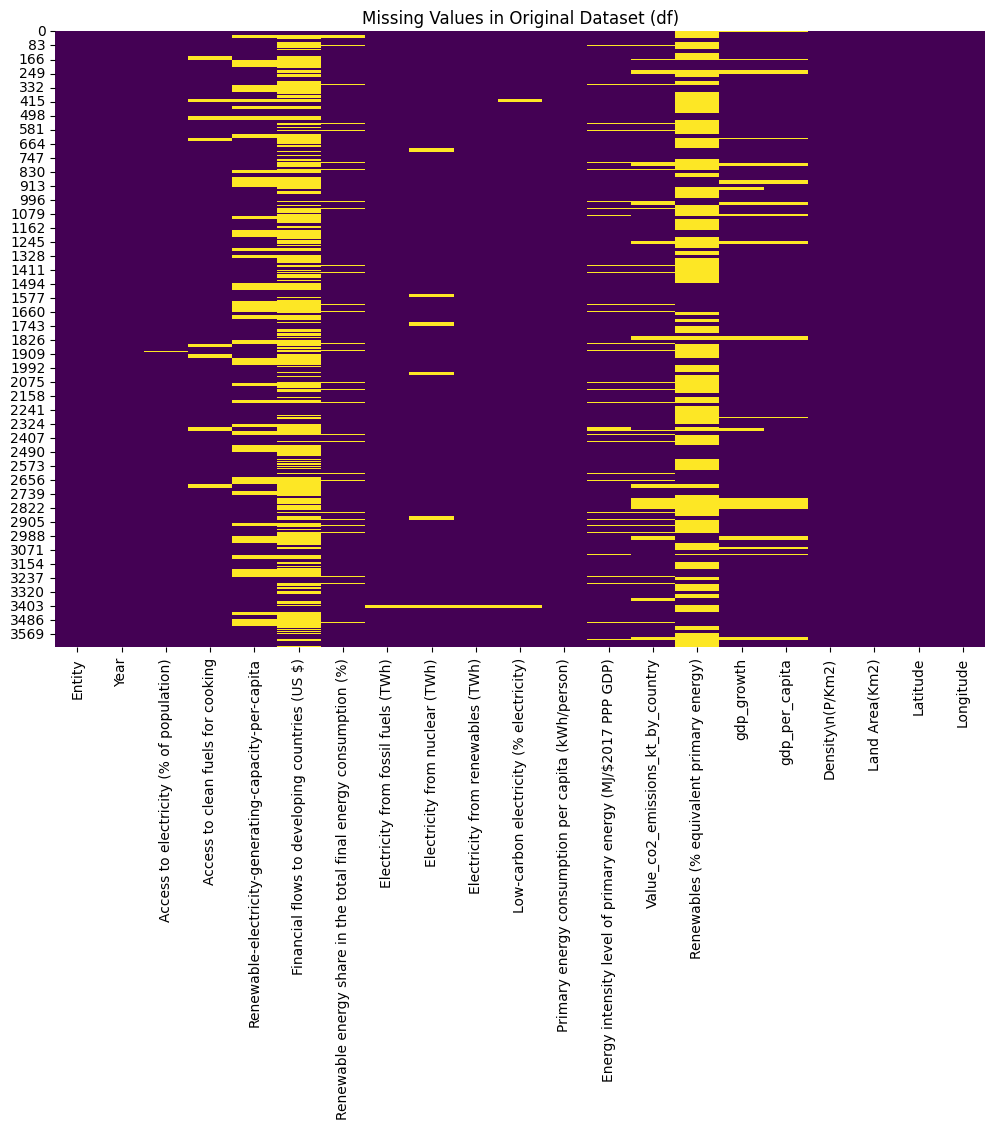

In [19]:
missing_df = df.isnull()

plt.figure(figsize=(12, 8))
sns.heatmap(missing_df, cmap='viridis', cbar=False)
plt.title('Missing Values in Original Dataset (df)')
plt.show()

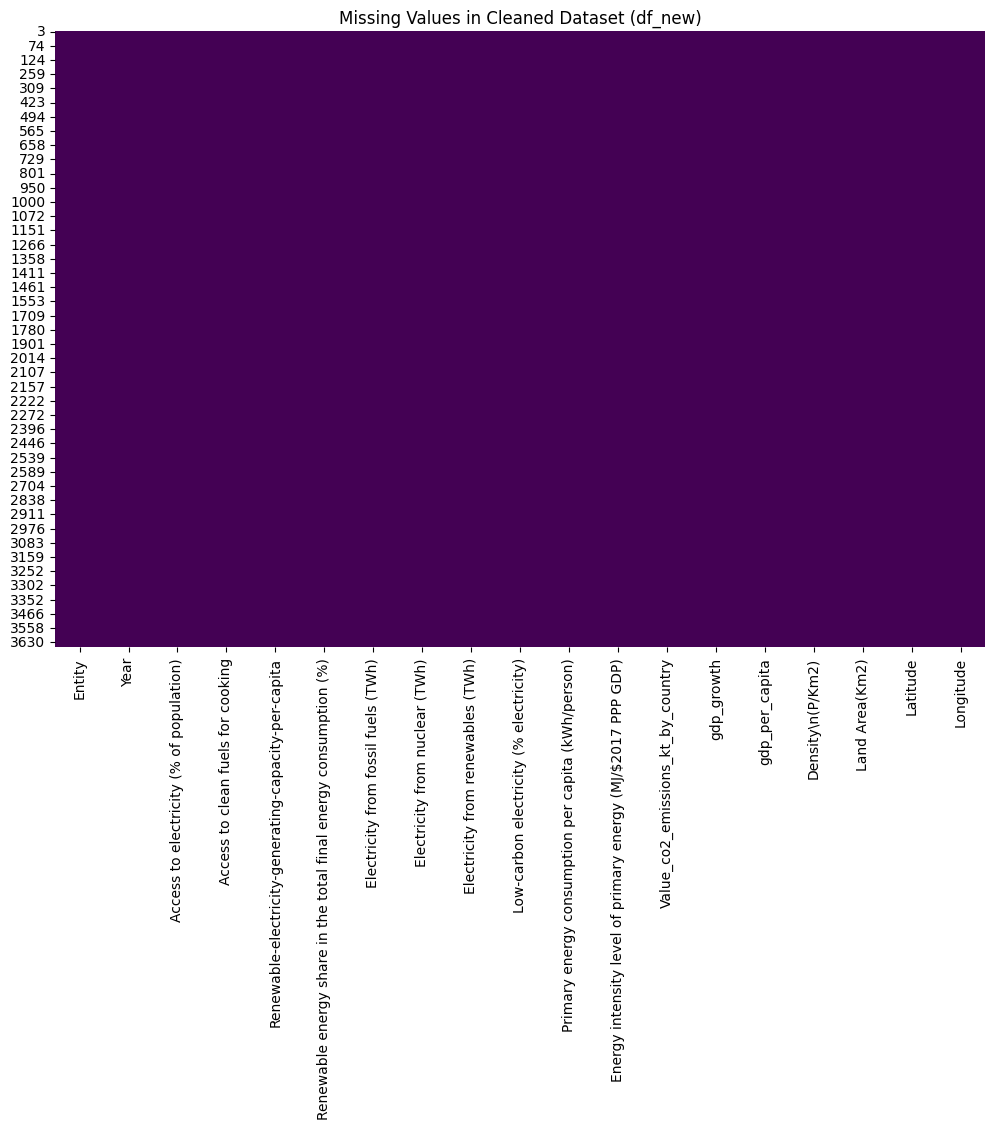

In [ ]:
missing_df_new = df_new.isnull() #cleaned one

plt.figure(figsize=(12, 8))
sns.heatmap(missing_df_new, cmap='viridis', cbar=False)
plt.title('Missing Values in Cleaned Dataset (df_new)')
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_new['Country'] = label_encoder.fit_transform(df_new['Entity'])

<ipython-input-21-48c1e1cce570>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Country'] = label_encoder.fit_transform(df_new['Entity'])


In [22]:
X = df_new[['Country','Electricity from fossil fuels (TWh)','Electricity from nuclear (TWh)','Electricity from renewables (TWh)']]
y = df_new['Value_co2_emissions_kt_by_country']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Mean Squared Error: 5837336023.094571
R-squared Score: 0.9958352527328905


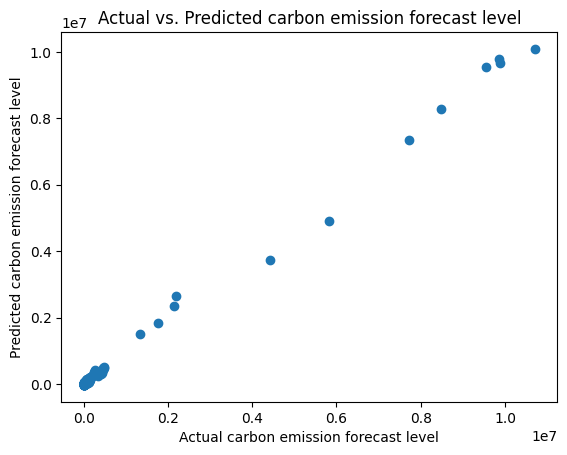

In [23]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual carbon emission forecast level')
plt.ylabel('Predicted carbon emission forecast level')
plt.title('Actual vs. Predicted carbon emission forecast level')
plt.show()

In [24]:
df_new

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,Country
3,Afghanistan,2003,14.738506,9.50,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60,652230.0,33.939110,67.709953,0
4,Afghanistan,2004,20.064968,10.90,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60,652230.0,33.939110,67.709953,0
5,Afghanistan,2005,25.390894,12.20,7.51,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,11.229715,242.031313,60,652230.0,33.939110,67.709953,0
6,Afghanistan,2006,30.718690,13.85,7.40,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,5.357403,263.733602,60,652230.0,33.939110,67.709953,0
7,Afghanistan,2007,36.051010,15.30,7.25,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,13.826320,359.693158,60,652230.0,33.939110,67.709953,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,Zimbabwe,2015,33.700000,29.50,63.54,80.82,4.02,0.0,5.37,57.188496,3860.92020,10.36,12430.000310,1.779873,1445.069702,38,390757.0,-19.015438,29.154857,107
3644,Zimbabwe,2016,42.561730,29.80,62.88,81.90,3.50,0.0,3.32,48.680350,3227.68020,10.00,11020.000460,0.755869,1464.588957,38,390757.0,-19.015438,29.154857,107
3645,Zimbabwe,2017,44.178635,29.80,62.33,82.46,3.05,0.0,4.30,58.503407,3068.01150,9.51,10340.000150,4.709492,1235.189032,38,390757.0,-19.015438,29.154857,107
3646,Zimbabwe,2018,45.572647,29.90,82.53,80.23,3.73,0.0,5.46,59.412407,3441.98580,9.83,12380.000110,4.824211,1254.642265,38,390757.0,-19.015438,29.154857,107


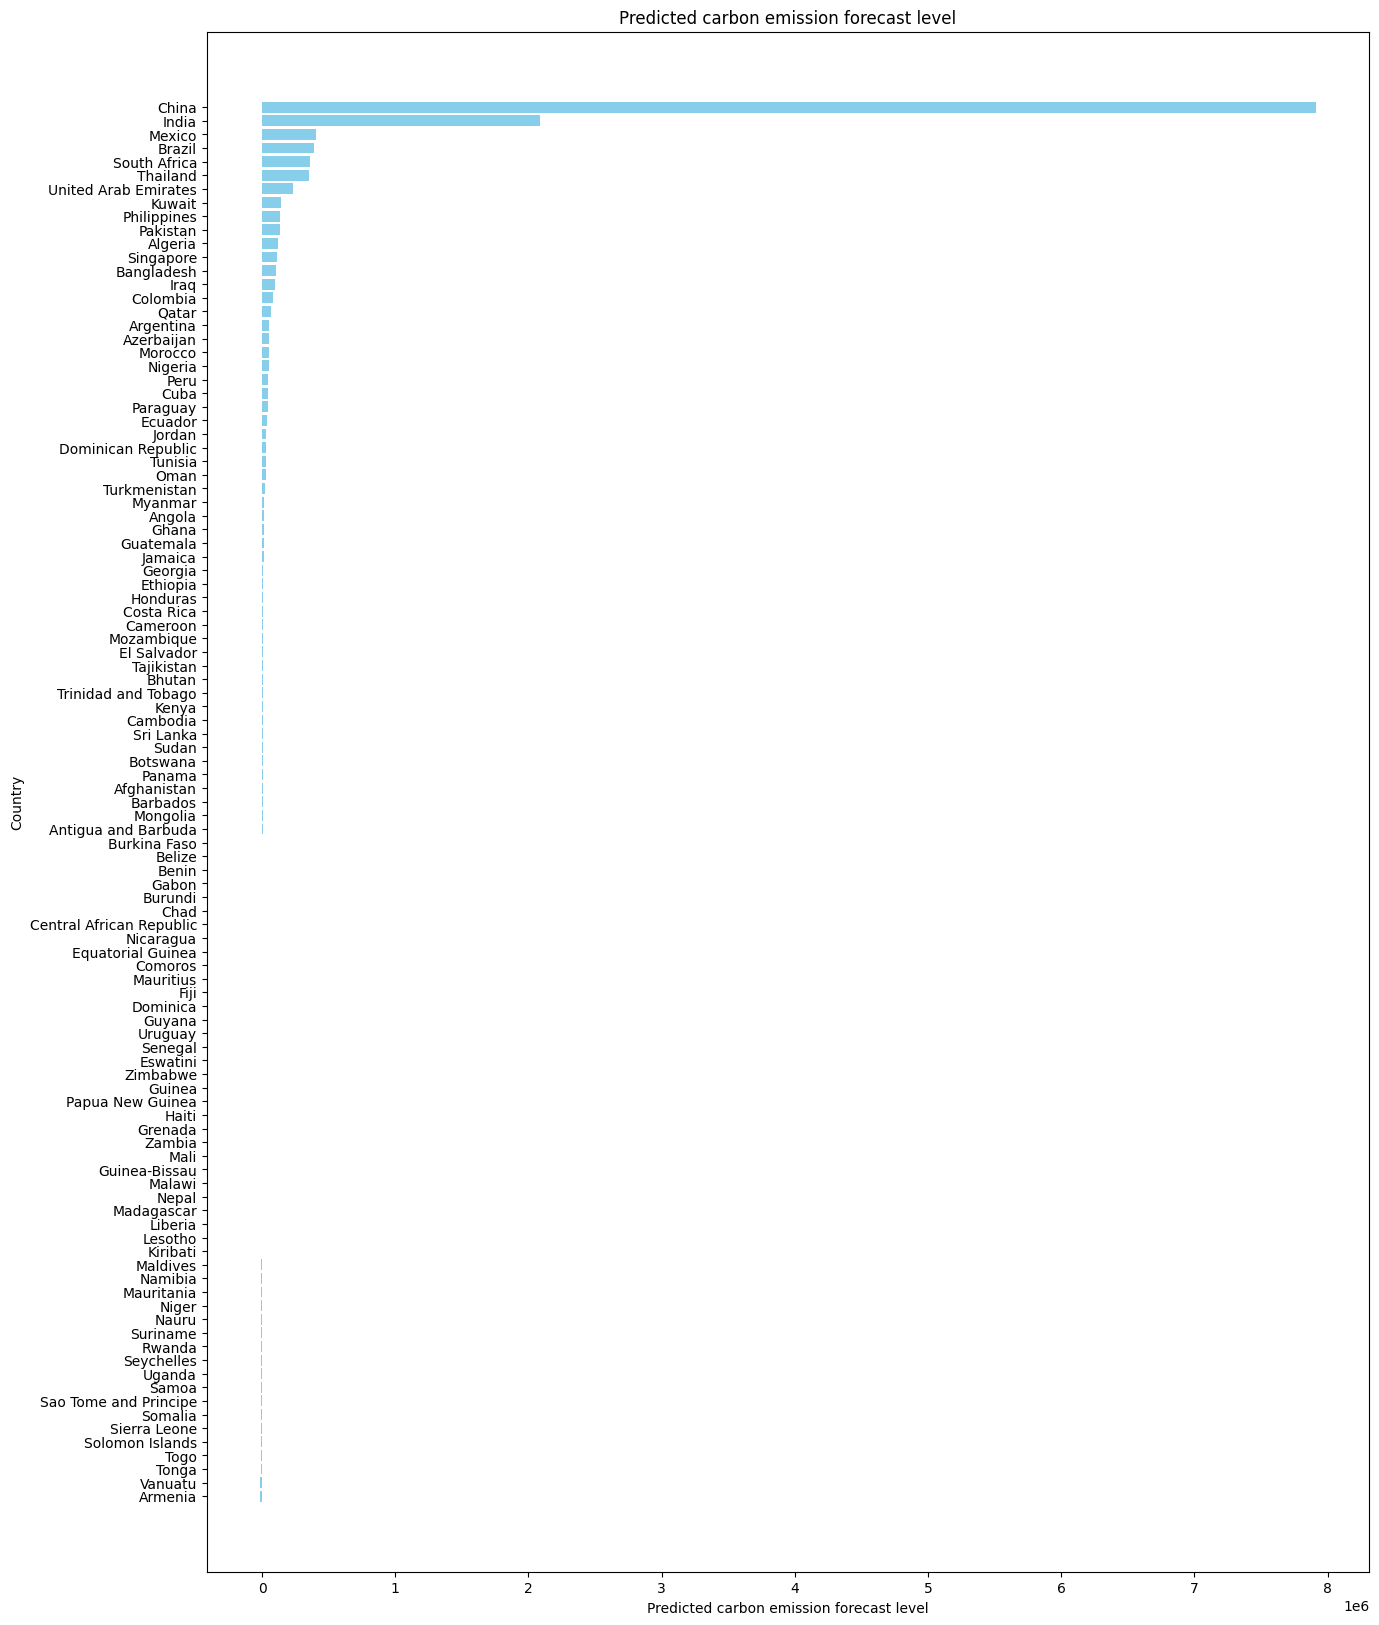

In [25]:
results = pd.DataFrame({'Country': label_encoder.inverse_transform(X_test['Country']), 'Predicted carbon emission forecast level': y_pred})

results_grouped = results.groupby('Country').mean()

results_grouped_sorted = results_grouped.sort_values(by='Predicted carbon emission forecast level')

plt.figure(figsize=(15, 20))
plt.barh(results_grouped_sorted.index, results_grouped_sorted['Predicted carbon emission forecast level'], color='skyblue')
plt.xlabel('Predicted carbon emission forecast level')
plt.ylabel('Country')
plt.title('Predicted carbon emission forecast level')
plt.show()


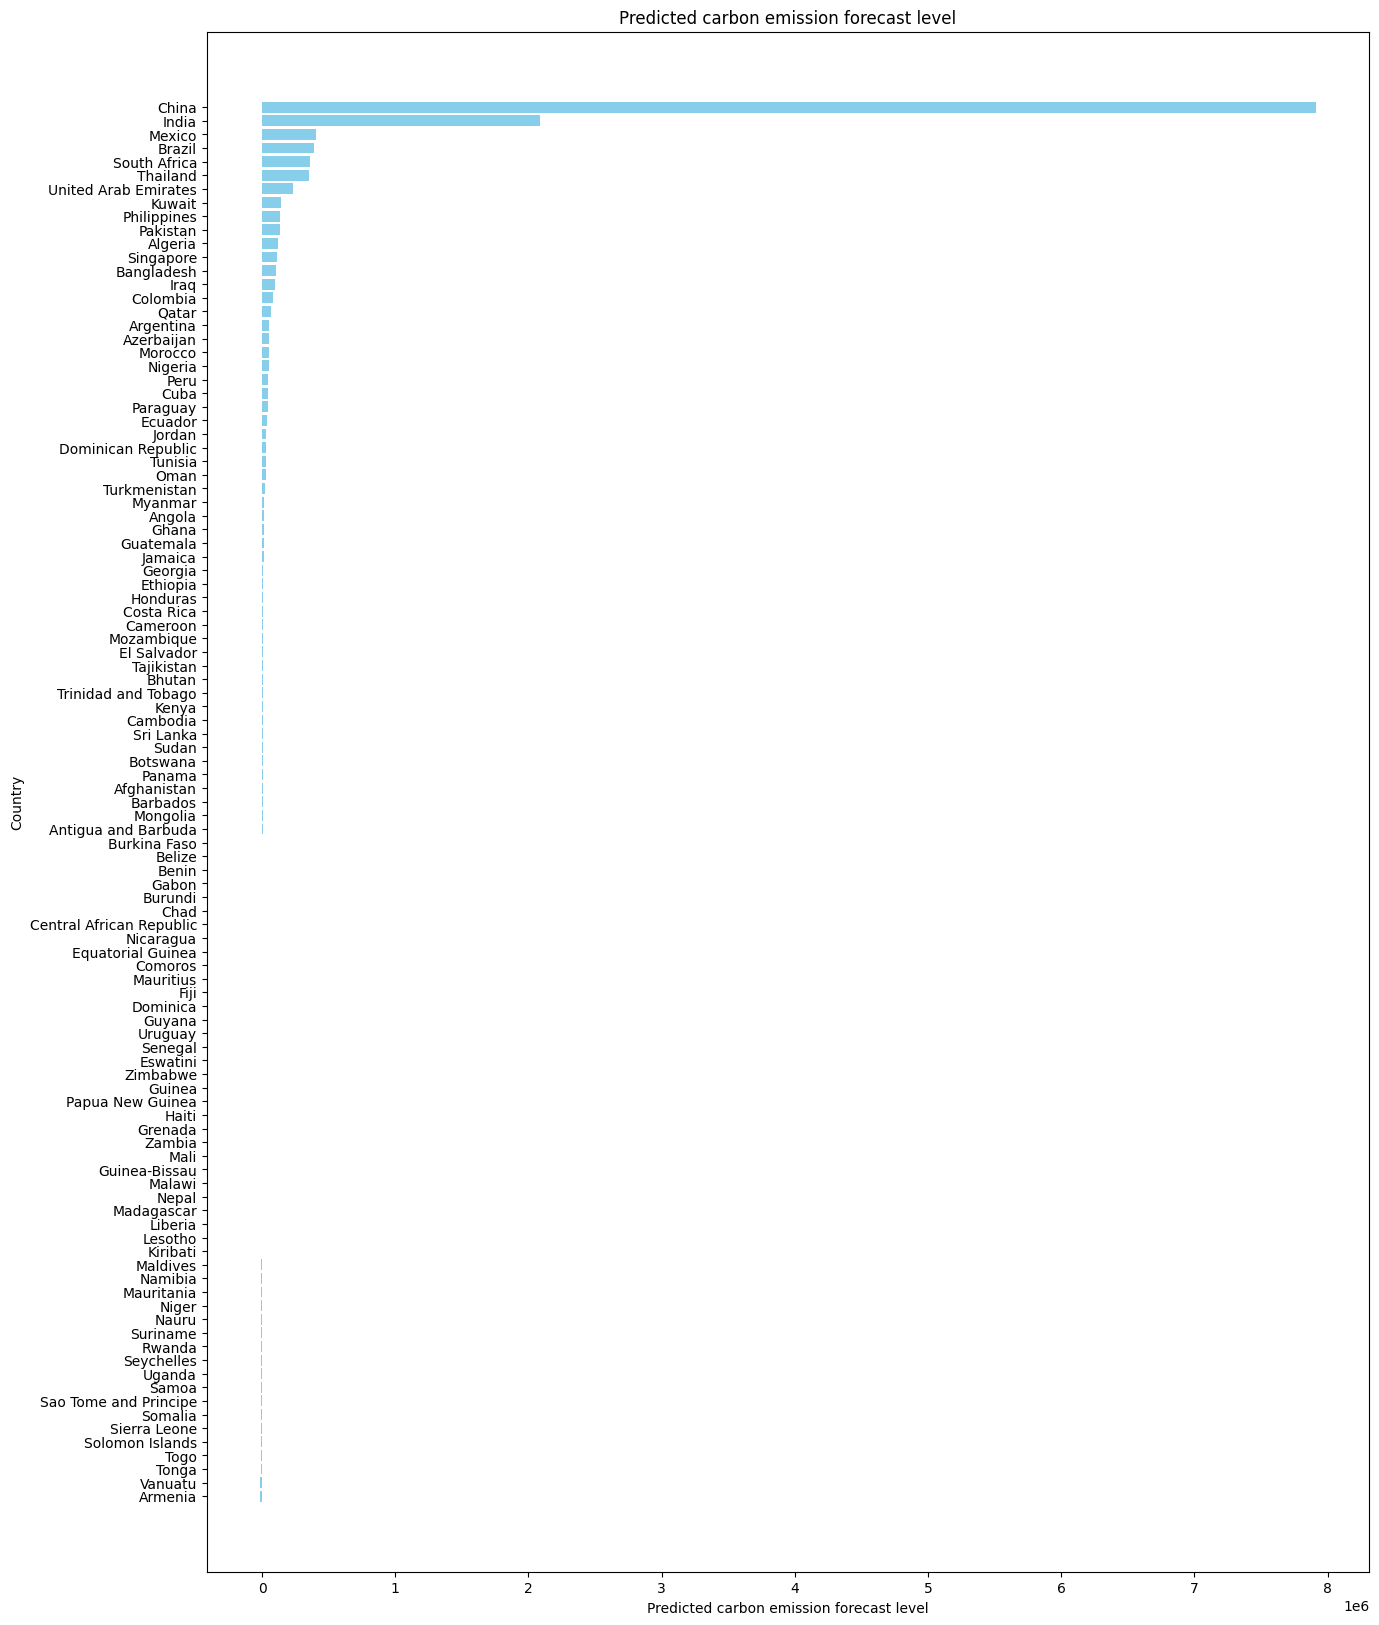

In [26]:
results = pd.DataFrame({'Country': label_encoder.inverse_transform(X_test['Country']), 'Predicted carbon emission forecast level': y_pred})

results_grouped = results.groupby('Country').mean()

results_grouped_sorted = results_grouped.sort_values(by='Predicted carbon emission forecast level')

plt.figure(figsize=(15, 20))
plt.barh(results_grouped_sorted.index, results_grouped_sorted['Predicted carbon emission forecast level'], color='skyblue')
plt.xlabel('Predicted carbon emission forecast level')
plt.ylabel('Country')
plt.title('Predicted carbon emission forecast level')
plt.show()
